Import Libraries:

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

Start Clock:

In [254]:
start_time = time.time()

Load OBAs:

In [255]:
filename_oba = '/Users/spencershortt/Spencer_SMC/SMC_OBAs.txt'

list_oba = np.loadtxt(filename_oba, skiprows=0)
data_oba = np.array(list_oba)

initial_ra_oba = np.array(data_oba[:,0])
initial_dec_oba = np.array(data_oba[:,1])

Load HMXBs:

In [256]:
filename_hmxb = '/Users/spencershortt/Spencer_SMC/SMC_HMXBs.txt'

list_hmxb = np.loadtxt(filename_hmxb, skiprows=0)

data_hmxb = np.array(list_hmxb)

catalog_number_hmxb = np.array(data_hmxb[:,0])
ra_hmxb = np.array(data_hmxb[:,1])
dec_hmxb = np.array(data_hmxb[:,2])

Initialize Variables:

In [257]:
radii_bins=20

ra_min=6
ra_max=23

dec_min=-75
dec_max=-70.5

distanceToSMC=61
N=10**5

Clean OBAs:

In [258]:
new_ra_OBAs=[]
new_dec_OBAs=[]
for k,oba in enumerate(initial_ra_oba):
    if (oba>ra_min and oba<ra_max):
        new_ra_OBAs.append(oba)
        new_dec_OBAs.append(initial_dec_oba[k])
Oba_ra=np.array(new_ra_OBAs)
Oba_dec=np.array(new_dec_OBAs)
print( Oba_ra )
print(len(Oba_ra))

[  6.9875    7.01667   7.34167   7.475     7.50417   7.51667   7.6125
   8.23333   8.75833   8.93333   9.20833   9.3125    9.3125    9.35      9.6
  10.0625   10.1875   10.3375   10.61667  10.75     10.75417  10.75833
  10.8125   10.86667  10.90833  10.925    10.93333  11.09583  11.1
  11.22917  11.25417  11.29167  11.32917  11.34167  11.35     11.375
  11.375    11.39167  11.50833  11.52083  11.59583  11.6375   11.73333
  11.79583  11.9125   11.92917  11.95833  12.00833  12.07083  12.11667
  12.16667  12.3125   12.3125   12.45     12.51667  12.54167  12.5875   12.6
  12.65417  12.65833  12.67083  12.67083  12.675    12.69167  12.71667
  12.72083  12.77083  12.8625   12.86667  12.875    12.8875   12.925    12.95
  12.95417  12.9625   12.96667  12.99583  13.03333  13.03333  13.03333
  13.04583  13.05833  13.0625   13.0875   13.0875   13.10417  13.13333
  13.175    13.19167  13.20833  13.20833  13.2125   13.225    13.25417
  13.26667  13.29583  13.38333  13.38333  13.4      13.41667  13.

Create Radii:

In [259]:
radii =np.linspace(.25, 10, radii_bins).reshape(radii_bins,1)


#radii =np.linspace(.25, 10, radii_bins)
print(radii)
#newBins=np.linspace(.25, 10, radii_bins+1)

[[  0.25      ]
 [  0.76315789]
 [  1.27631579]
 [  1.78947368]
 [  2.30263158]
 [  2.81578947]
 [  3.32894737]
 [  3.84210526]
 [  4.35526316]
 [  4.86842105]
 [  5.38157895]
 [  5.89473684]
 [  6.40789474]
 [  6.92105263]
 [  7.43421053]
 [  7.94736842]
 [  8.46052632]
 [  8.97368421]
 [  9.48684211]
 [ 10.        ]]


Create random ra and decs for homogeneous sample:

In [260]:
#R2
rand_ra_OBAs = np.random.uniform(low=ra_min, high=ra_max, size=( N,))#len(Oba_ra) *
rand_dec_OBAs= np.random.uniform(low=dec_min, high=dec_max, size=( N,))#len(Oba_ra) *
#R1
rand_ra_HMXBs = np.random.uniform(low=ra_min, high=ra_max, size=( N,))#len(Oba_ra) *
rand_dec_HMXBs= np.random.uniform(low=dec_min, high=dec_max, size=( N,))

Create arrays full of zeros:

In [261]:
D1R2_tot=np.zeros(radii_bins)
D1D2_tot=np.zeros(radii_bins)
R1R2_tot=np.zeros(radii_bins)
R1D2_tot=np.zeros(radii_bins)

Loop for each HMXB:
1. Find the angles -> results in array of length 10^5
2. Convert to kpc
3. Compare them to radii -> results in a 2D array with 10^5 coloumns and 20 rows (depending on your bin size for the radii)
4. Count the amount of True values in each row - then multiply by 1/(N/len(Oba_ra))
5. Add to D1R2_tot

In [262]:
for i,ra in enumerate(ra_hmxb):
    
    
    
    #D1R2
    D1R2angles=np.sqrt((ra-rand_ra_OBAs)**2+(dec_hmxb[i]-rand_dec_OBAs)**2)
    D1R2distances=distanceToSMC*np.sin(np.deg2rad((D1R2angles)))
    D1R2_condition=(radii>D1R2distances)
    D1R2_arr=np.count_nonzero(D1R2_condition, axis=1)*len(Oba_ra)/(N)
    D1R2_tot+=D1R2_arr
    #D1R2_arr=np.histogram(D1R2distances,newBins)[0]
    #print(D1R2_arr)
    #print(D1R2_arr.shape)
    #print(D1R2_tot.shape)
    #D1R2_tot=D1R2_tot+np.array(D1R2_arr)
    #print("hi")
    
    #D1D2
    D1D2angles=np.sqrt((ra-Oba_ra)**2+(dec_hmxb[i]-Oba_dec)**2)
    D1D2distances=distanceToSMC*np.sin(np.deg2rad((D1D2angles)))
    D1D2_condition=(radii>D1D2distances)
    D1D2_arr=np.count_nonzero(D1D2_condition, axis=1)
    D1D2_tot+=D1D2_arr
    #D1D2_arr=np.histogram(D1D2distances,newBins)[0]
    #D1D2_tot+=D1D2_arr

Print Time:

In [263]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.1197590827941895 seconds ---


Loop for each randomly generated HMXB (currently takes 10 minutes):
1. Find the angles -> results in array of length 10^5
2. Convert to kpc
3. Compare them to radii -> results in a 2D array with 10^5 coloumns and 20 rows (depending on your bin size for the radii) 
4. Count the amount of True values in each row - then multiply by 1/(N/len(Oba_ra))
5. Add to D1R2_tot

In [264]:
for i,random_ra in enumerate(rand_ra_HMXBs):
    
    #R1D2
    R1D2angles=np.sqrt((random_ra-Oba_ra)**2+(rand_dec_HMXBs[i]-Oba_dec)**2)
    R1D2distances=distanceToSMC*np.sin(np.deg2rad((R1D2angles)))
    
    R1D2_condition=(radii>R1D2distances)
    R1D2_arr=np.count_nonzero(R1D2_condition, axis=1)
    R1D2_tot+=R1D2_arr
    
    
    #R1D2_arr=np.histogram(R1D2distances,newBins)[0]
    #R1D2_tot+=R1D2_arr
    #print(i)
    
    
    #R1R2
    R1R2angles=np.sqrt((random_ra-rand_ra_OBAs)**2+(rand_dec_HMXBs[i]-rand_dec_OBAs)**2)
    R1R2distances=distanceToSMC*np.sin(np.deg2rad((R1R2angles)))
    
    R1R2_condition=(radii>R1R2distances)
    R1R2_arr=np.count_nonzero(R1R2_condition, axis=1)*len(Oba_ra)/(N)
    R1R2_tot+=R1R2_arr
    
    
    #R1R2_arr=np.histogram(R1R2distances,newBins)[0]
    #R1R2_tot+=R1R2_arr
    

Print Time:

In [265]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 708.4669210910797 seconds ---


Average D1R2 at each radius: 20 element array:

In [266]:
D1R2_avgs=D1R2_tot/len(ra_hmxb)

Average D1D2 at each radius: 20 element array:

In [267]:
D1D2_avgs=D1D2_tot/len(ra_hmxb)

Average R1R2 at each radius: 20 element array:

In [268]:
R1R2_avgs=R1R2_tot/len(rand_ra_HMXBs)

Average R1R2 at each radius: 20 element array:

In [269]:
R1D2_avgs=R1D2_tot/len(rand_ra_HMXBs)

Calculate Xi based on Peebles (1980):

In [270]:
#Xi=D1D2_avgs/D1R2_avgs -1

Calculate Xi based on Landy & Szalay (1993)

In [271]:
Xi=(D1D2_avgs-D1R2_avgs-R1D2_avgs+R1R2_avgs)/R1R2_avgs

Make radii vs Xi plot:

In [1]:
fig, axes=plt.subplots(1,1)
axes.scatter(radii, Xi, label="Homogeneous")

axes.set_xlabel("Distance From a Given HMXB $[kpc]$")
axes.set_ylabel("$\\xi (r)$")
axes.legend(loc="upper right")
figure , ax=plt.subplots(1,1)

NameError: name 'plt' is not defined

Make Map:

In [273]:
ax.scatter(ra_hmxb, dec_hmxb,label="HMXBs")
ax.scatter(Oba_ra, Oba_dec,label="OBAs")
#ax.set_xlim(24, 5)
ax.invert_xaxis()
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Decl.")
#ax.legend(loc="upper right")

Plot:

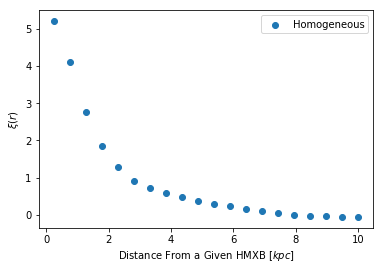

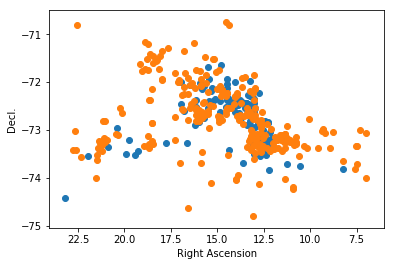

In [274]:
plt.show()